# Analisis Exploratorio

### En este notebook vamos a tomar los datos generados en el notebook anterior. Luego vamos a realizar un análisis exploratorio para conocer mejor los productos con descuento dentro del marketplace.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize']=12,8
import seaborn as sns
sns.set_style('darkgrid')
from IPython.display import Markdown

In [2]:
import statsmodels.api as sm
sns.set(rc={'figure.figsize':(10, 5)})

Levanto el df generado con el notebook anterior

In [3]:
df_total = pd.read_csv("df_total_original.csv")

In [4]:
df_total.head()

,Unnamed: 0,id,site_id,title,price,currency_id,available_quantity,sold_quantity,buying_mode,listing_type_id,...,address__city_name,shipping__free_shipping,shipping__store_pick_up,original_price,category_id,official_store_id,catalog_product_id,attributes__marca,attributes__modelo,categoria_principal
0,0,MLA610309020,MLA,Sensor De Estacionamiento * Colores Con Displa...,1729.80,ARS,50,5000,buy_it_now,gold_special,...,Liniers,False,False,NaN,MLA45905,NaN,NaN,Lefer,XD-068,Accesorios para Vehículos
1,1,MLA1103800748,MLA,Casco Para Moto Integral Halcon H57 Blanco Ta...,3499.00,ARS,1,47,buy_it_now,gold_special,...,Floresta,False,True,NaN,MLA4712,NaN,MLA11386905,Halcon,H57,Accesorios para Vehículos
2,2,MLA636709517,MLA,Cubre Alfombra Goma Pesada Universal 3 Piezas ...,2159.99,ARS,50,5000,buy_it_now,gold_special,...,Ciudadela,False,False,NaN,MLA2219,NaN,NaN,At,Cubre alfombra,Accesorios para Vehículos
3,3,MLA634474528,MLA,Aceite Motul 8100 X-cess 5w40 X 5 Lts.,7810.00,ARS,1,5000,buy_it_now,gold_special,...,Caseros,True,False,NaN,MLA375007,NaN,MLA10427504,Motul,Auto,Accesorios para Vehículos
4,4,MLA909004508,MLA,"Estéreo Para Auto Electroland Orgt Con Usb, Bl...",3470.11,ARS,79,6020,buy_it_now,gold_special,...,Boedo,False,False,3899.0,MLA6867,NaN,MLA16999186,NaN,NaN,Accesorios para Vehículos


In [5]:
#listemos todas las features de df
list(df_total)

['Unnamed: 0',
 'id',
 'site_id',
 'title',
 'price',
 'currency_id',
 'available_quantity',
 'sold_quantity',
 'buying_mode',
 'listing_type_id',
 'condition',
 'accepts_mercadopago',
 'address__state_name',
 'address__city_name',
 'shipping__free_shipping',
 'shipping__store_pick_up',
 'original_price',
 'category_id',
 'official_store_id',
 'catalog_product_id',
 'attributes__marca',
 'attributes__modelo',
 'categoria_principal']

In [6]:
cuenta_categoria=df_total["categoria_principal"].nunique()
numero_observaciones=len(df_total)
print(f'se registraron {numero_observaciones} observaciones para {cuenta_categoria} categorias dentro del search realizado')

se registraron 31791 observaciones para 32 categorias dentro del search realizado


Vamos a hacer un describe para conocer distribucion de las variables numericas. Tanto price y original price tiene gran varianza. El 25% de los valores es < 1590AR y el 25% de los valores es> 1590000. Esto se debe a que las publicaciones varian en un amplio rango desde autos o inmuebles hasta productos de belleza o indumentaria.

In [7]:
df_total.describe()

,Unnamed: 0,price,available_quantity,sold_quantity,original_price,official_store_id
count,31791.000000,3.147700e+04,31791.000000,31791.000000,5.131000e+03,4444.000000
mean,24.514359,1.500393e+05,475.783146,401.894593,1.989856e+04,1613.410216
std,14.405769,9.419676e+05,3792.123147,1618.308768,4.251829e+04,832.449911
min,0.000000,1.000000e+00,1.000000,0.000000,2.900000e+01,1.000000
25%,12.000000,1.599000e+03,1.000000,6.000000,2.212500e+03,976.000000
50%,25.000000,4.697000e+03,4.000000,100.000000,6.495000e+03,1666.000000
75%,37.000000,1.562750e+04,100.000000,500.000000,1.874750e+04,2293.000000
max,49.000000,6.900002e+07,99944.000000,50000.000000,1.046149e+06,2843.000000


### Vamos a chequear la cantidad de nulos en cada variable (absoluto y porcentual):
* la varible original price tiene 85% de nulos lo que quiere decir que el 15% de los productos tiene descuento en la muestra tomada
* la mayoria de las variables tiene 0 % de nulos. Aunque hay otras features que tienen un porcentaje considerable variando desde 87% al 1% mas adelante vamos a realizar algunos reemplazos para salvar los nulos cuando sea adecuado (obviamente no en original price donde dan mucha informacion)



In [8]:
#para obtener cantidad de nulos
len(df_total.index)-df_total.count()

Unnamed: 0                     0
id                             0
site_id                        0
title                          0
price                        314
currency_id                  314
available_quantity             0
sold_quantity                  0
buying_mode                    0
listing_type_id                0
condition                   1000
accepts_mercadopago            0
address__state_name            0
address__city_name             0
shipping__free_shipping        0
shipping__store_pick_up        0
original_price             26660
category_id                    0
official_store_id          27347
catalog_product_id         18222
attributes__marca           6420
attributes__modelo         10351
categoria_principal            0
dtype: int64

In [9]:
# para obtener la cantidad de nulos como porcentaje del total
(len(df_total.index)-df_total.count())/len(df_total.index)*100

Unnamed: 0                  0.000000
id                          0.000000
site_id                     0.000000
title                       0.000000
price                       0.987701
currency_id                 0.987701
available_quantity          0.000000
sold_quantity               0.000000
buying_mode                 0.000000
listing_type_id             0.000000
condition                   3.145544
accepts_mercadopago         0.000000
address__state_name         0.000000
address__city_name          0.000000
shipping__free_shipping     0.000000
shipping__store_pick_up     0.000000
original_price             83.860212
category_id                 0.000000
official_store_id          86.021201
catalog_product_id         57.318109
attributes__marca          20.194395
attributes__modelo         32.559529
categoria_principal         0.000000
dtype: float64

Notar que apenas el 16% de los productos tiene descuento. Considerando la cantidad total de productos esta podria ser una muestra no representativa seria bueno tomar una muestra mas grande y chequear 

### En esta sección vamos a crear algunas variables utiles para el analisis y graficar

In [10]:
df_total["tiene_descuento"]=~df_total["original_price"].isnull()

#### Vamos a hacer un grafico para chequear el porcentaje de productos con descuento en las diferentes categorias.

De el mismo concluimos:
    
* Hay 4 categorias que no tienen producto con descuento(autos motos, inmuebles, servicios, entrada para eventos)
* Las categorias con mas descuentos son belleza y cuidado personal y alimentos y bebidas. Con un descuento de 38% aprox


In [11]:
cuenta_categoria = (df_total.groupby(['categoria_principal'])['tiene_descuento']
                     .value_counts(normalize=True)
                     .rename('porcentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('categoria_principal'))


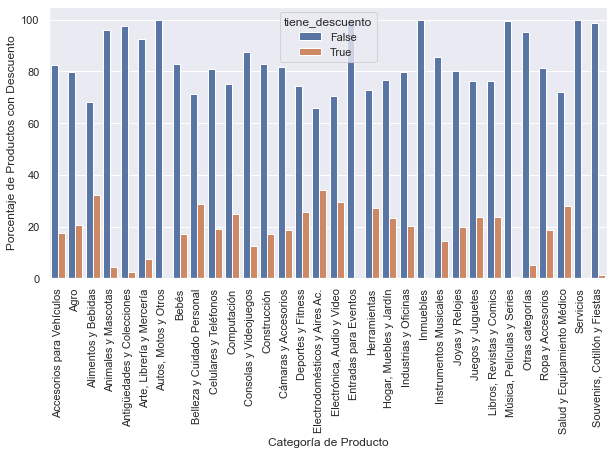

In [12]:
p = sns.barplot(x="categoria_principal", y="porcentage", hue="tiene_descuento", data=cuenta_categoria)
plt.xlabel('Categoría de Producto')
plt.ylabel('Porcentaje de Productos con Descuento')

_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

En el grafico anterior vemos que hay categorias que o no tienen productos con descuento o si bien tienen productos con descuentos los mismos son muy pocos y no tienen 
representatividad. Vamos a excluir del analisis las categorias cuyos productos con descuento sean <50 

In [13]:
#producto con descuento df con solo los productos con descuento
#luego contamoscuantos descuentos por categoria
productos_con_descuento=df_total[df_total.tiene_descuento]
cuenta_descuento=productos_con_descuento.categoria_principal.value_counts()
cuenta_descuento

Electrodomésticos y Aires Ac.    340
Alimentos y Bebidas              320
Electrónica, Audio y Video       296
Belleza y Cuidado Personal       286
Salud y Equipamiento Médico      279
Herramientas                     270
Deportes y Fitness               255
Computación                      247
Juegos y Juguetes                238
Hogar, Muebles y Jardín          231
Libros, Revistas y Comics        224
Agro                             204
Industrias y Oficinas            201
Joyas y Relojes                  197
Celulares y Teléfonos            189
Ropa y Accesorios                186
Cámaras y Accesorios             185
Construcción                     171
Bebés                            170
Accesorios para Vehículos        165
Instrumentos Musicales           143
Consolas y Videojuegos           125
Arte, Librería y Mercería         74
Otras categorías                  50
Animales y Mascotas               42
Antigüedades y Colecciones        24
Souvenirs, Cotillón y Fiestas     12
M

In [14]:
#ahora si sacamos las categorias con <50 productos
productos_con_descuento = productos_con_descuento[productos_con_descuento.categoria_principal.isin(cuenta_descuento[cuenta_descuento >= 50].index)]

En el siguiente grafico vamos a analizar el conjunto de productos con descuento. 

* los productos que tienen mayor porcentaje dentro del conjunto son alimentos y bebidas y belleza
* notar que este no es el mismo calculo que el anterior. Antes analizabamos el porcentaje de productos con descuento dentro de la categoria y ahora lo analizamos dentro de los productos con descuento. Es decir que porcentaje del total cubre cada producto. 

Text(0, 0.5, 'Porcentaje %')

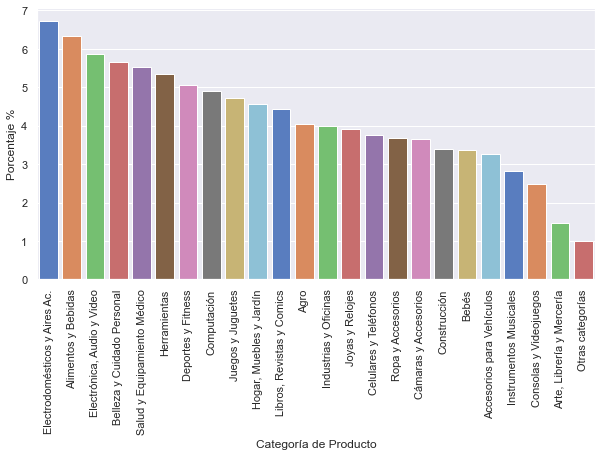

In [15]:
descuento_categoria = pd.DataFrame(productos_con_descuento.categoria_principal.value_counts()/len(productos_con_descuento) * 100)
ax = sns.barplot(x=descuento_categoria.index, y=descuento_categoria.categoria_principal, data=productos_con_descuento, ci=None, palette="muted",orient='v')
_ = plt.setp(ax.get_xticklabels(), rotation=90)  
plt.xlabel('Categoría de Producto')
plt.ylabel('Porcentaje %')

Este grafico nos da un buen paneo de como se compone porcentualmente las categorias de productos con descuentos. Los que mas productos con descuento tienencomo porcentaje del total son electrodomesticos Alimentos y Electronica. Y los que menos consolas Arte y Otras categorias (esto no quiere decir que estas categorias tengan pocos productos con descuento dentro de si. Ya que podrian tener baja representatividad en la muestra)

### Calculo de descuento

Se calculara el descuento porcentual (expresado en fracción) teniendo en cuenta que:
    
$$original\_price \times (1 - d) = price$$

donde $original\_price_i$ es el precio original del producto, $d$ es el descuento que tiene y $price$ es el precio final del producto. 
(notemos que esto se puede hacer así porque estamos trabajando con un df solo de productos con descuento)

Despejando se tiene que, 

$$d = 1 - \frac{price}{original\_price}$$

In [16]:
productos_con_descuento['vlr_descuento']=1-productos_con_descuento['price']/productos_con_descuento['original_price']

In [17]:
productos_con_descuento['vlr_descuento'].describe()

count    5046.000000
mean        0.163110
std         0.149626
min         0.000000
25%         0.050000
50%         0.100008
75%         0.230769
max         0.750125
Name: vlr_descuento, dtype: float64

#### Podemos concluir que la media de los descuentos es el 16% y el percentil 50 es el 10%. El percentil 75 es el 23% y el maximo en descuentos es el 75%.

#### En otras palabras si obtenemos un descuento > del 17% en un producto estamos sobre la media. Y si obtenemos mas de 25% es un buen descuento ya que solo el 25% de los productos tienen descuento mayor.


Nota:
    
Se observa que hay productos con 0% de descuento. Son productos cuyo precio original no es nulo pero esta tan cercano a price que se aproxima por 0.

Para sacar conclusiones vamos a analizar los productos que tengan un descuento no despreciable. Tomamos como limite un descuento > al 1%

In [18]:
productos_con_descuento=productos_con_descuento[productos_con_descuento.vlr_descuento>=0.01]

#### Vamos a analizar los descuentos en funcion de su categoria y su precio.
Antes dijimos que si obtenemos un descuento > 17% es algo bueno ya que es superior a la media. Pero que pasa si yo estoy comprando ropa o productos de belleze.Un descuento del 10% es un buen descuento? para responderlo habria que analizarlo en funcion de su categoria. Lo mismo con el precio. Tal vez para un producto de precio alto un descuento del 5% sea algo apreciable... En esta seccion vamos a intentar responder estas preguntas. Para esto realizamos un boxplot.

Del mismo vemos:

* Si bien deportes y fitness tiene el valor de descuento más alto. Este dato no es relevante ya que es un outlyer para su categoría (descuento por encima del 70%)

* camaras, belleza y cuidado personal, salud y equipamiento medico su media esta por arriba del 20% (en este caso un descuento del 10% esta muy por debajo de la media)

* Celulares, consolas y video juegos y libros revistas (...) joyas y relojes son las categorias con menor descuento. Su media esta por debajo del 10%. En este caso si compramos por ejemplo un celular un descuento del 10% es muy bueno. Mucho mas si compramos un reloj donde dicho descuento se encuentra en el percentil 75

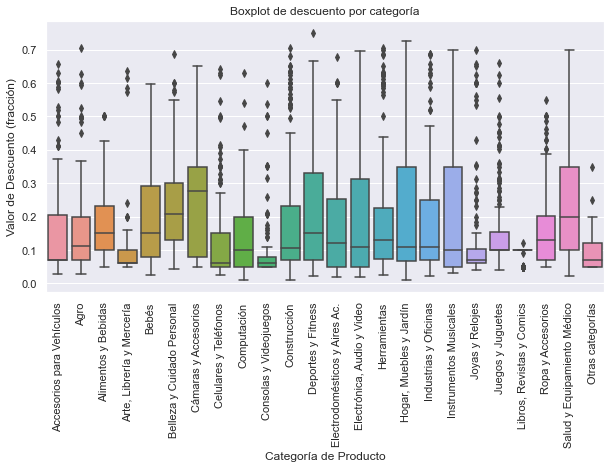

In [19]:
plt.figure(figsize=(10,5))
ax=sns.boxplot(x="categoria_principal",y="vlr_descuento",data=productos_con_descuento)
plt.title("Boxplot de descuento por categoría")
_ = plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("Categoría de Producto")
plt.ylabel("Valor de Descuento (fracción)")
plt.show()

Ahora vamos a analizar cual es la relación con el precio. Es decir las categorias con mas y menos descuento tienen algo que ver con el precio (yo sospecho que a precio más alto menor descuento. pero esto es algo que hay que corroborar con los datos). Asi que haremos un boxplot:

#### Conclusiones del boxplot:

Si bien hay una tendencia, es decir las categorias con precio con media elevadascomo computación o celulares tienen un descuento por debajo de la media. Y categorias con mucho descuento como ser salud tiene precios bajos. Dicho esto no se observa una clara correlacion ya que hay categorias como ser camaras que tienen descuentos alto pero mismo asi sus precios no son caros en comparacion (pensé que el efecto iba a ser más marcado). 

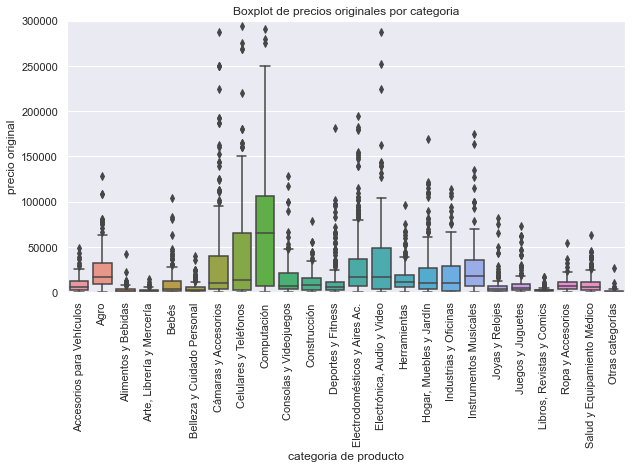

In [20]:
plt.figure(figsize=(10,5))
ax=sns.boxplot(x="categoria_principal",y="original_price",data=productos_con_descuento)
plt.title('Boxplot de precios originales por categoria')
_ = plt.setp(ax.get_xticklabels(), rotation=90)
plt.ylim((0,3e5)) #para que los outlyer no descalibren el eje
plt.xlabel('categoria de producto')
plt.ylabel('precio original')
plt.show()

De este gráfico vemos que la relación no es tan clara como yo pensaba. Joyas y relojes o celulares por ejemplo que son los productos con mas bajo descuento en media no son tan superiores al resto de los productos. Computacion si es la categoria con mayor precio en media marcado y tambien tenia descuentos bajo en media. En conclusion puede que exista una relacion entre precio y valor porcentual de descuento pero no es tan marcada.

Descuentos por provincia: En esta seccion vamos a inspeccionar si los descuentos son afectados por la provincia

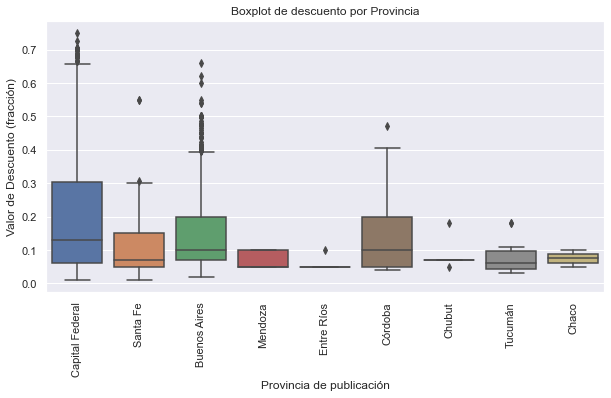

In [21]:
plt.figure(figsize=(10,5))
ax=sns.boxplot(x="address__state_name",y="vlr_descuento",data=productos_con_descuento)
plt.title("Boxplot de descuento por Provincia")
_ = plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("Provincia de publicación")
plt.ylabel("Valor de Descuento (fracción)")
plt.show()

Aca se ve que cordoba capital federal Buenos son donde se ofrecen los mejores descuentos y tambien son las provincias mas pobladas. parece haber una correlacion entre poblacion y descuento 

Tambien voy a analizar si el free shipping esta relacionado con el descuento. Mi hipotesis es que los productos que no tienen free shipping tienen mayor descuento. Ya que los vendedores lo podrían usar como estrategia dar un descuento en vez de poner envio gratis.


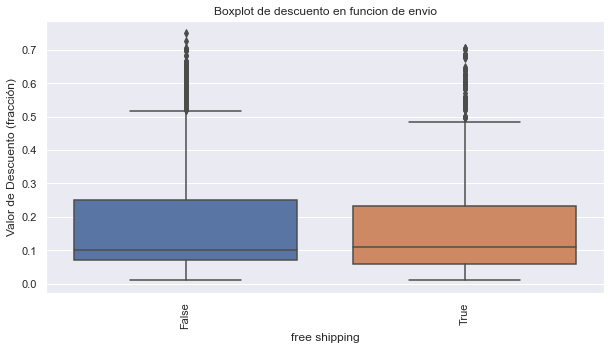

In [22]:
plt.figure(figsize=(10,5))
ax=sns.boxplot(x="shipping__free_shipping",y="vlr_descuento",data=productos_con_descuento)
plt.title("Boxplot de descuento en funcion de envio")
_ = plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("free shipping")
plt.ylabel("Valor de Descuento (fracción)")
plt.show()

Mi hipotesis no parece ser verdadera si bien la media de free shipping es un poco mayor el descuento son unos pocos puntos percentuales y los percentiles 25 y 75 son muy parecidos. No parecen tener diferencias estadisticamente significativas.

Esto me lleva a pensar que tal vez deberia reformularla. Mi nueva hipotesis es que dentro del marketplace hay mas productos con free shipping que dentro de la categoria de descuento (sin importar el valor nominal del descuento). Ya que el vendedor podria compensar el descuento sin ofrecer free shipping

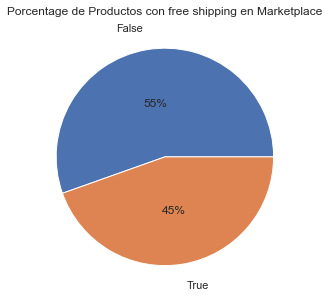

In [23]:
pie_chart = df_total.shipping__free_shipping.value_counts().sort_index().plot.pie(ylabel = '',  autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2)
plt.title('Porcentage de Productos con free shipping en Marketplace')
plt.show()

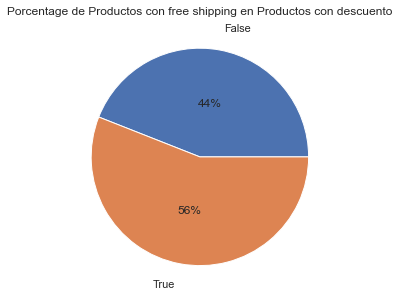

In [24]:
pie_chart = productos_con_descuento.shipping__free_shipping.value_counts().sort_index().plot.pie(ylabel = '',  autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2)
plt.title('Porcentage de Productos con free shipping en Productos con descuento')
plt.show()

mi hipotesis reformulada tampoco era verdadera ya que dentro de los productos con descuento hay mas porcentaje de free shipping que en el marketplace (contrario a lo que creia inicialmente)

#### Vamos a analizar la influencia de la condicion en los productos con descuento. 

In [25]:
productos_con_descuento.condition.value_counts(normalize=True,dropna= False)*100


new    100.0
Name: condition, dtype: float64

Veo que el 100% de los productos con descuentos son nuevos veamos si en el marketplace todos los productos tienen descuento

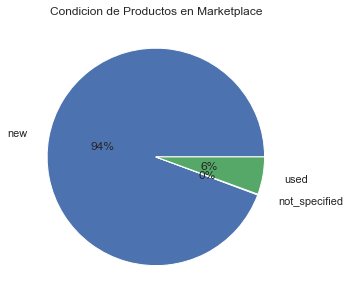

In [26]:
pie_chart = df_total.condition.value_counts().sort_index().plot.pie(ylabel = '',  autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2)
plt.title('Condicion de Productos en Marketplace')
plt.show()

en el marketplace el 6% de los productos con condicion son usados el 94% restante son nuevos.

En cambio vimos que en el conjunto de productos con descuento todos los productos son nuevos mostrando un cambio de proporcion en las poblaciones.  Esto quiere decir que si queremos encontrar un producto con descuento no podemos comprar usado.

## Conclusiones:

* Se observa que los descuentos en media son el 16% y un descuento del 23% esta en el percentil 75.El mayor valor observado es 70% aunque esto es altamente improbable ya que es un outlyer. 
* El descuento esta muy ligado a la categoria por ejemplo belleza tiene un alto descuento y otros productos como celulares o relojes estan por debajo. Por esto al analizarlo es importante ver la categoria.Un descuento del 15% genericamente puede no ser bueno pero si la categoria es relojes es un descuento excelente.
* Se observa alguna relacion entre productos con precios por encima de la media y menores descuentos.
* No se observo relacion entre free shipping y descuento
* Todos los productos con descuento son nuevos. Por lo tanto es altamente improbable encontrar un producto con descuento si compramos usados.
Todas estas conclusiones son validas si sabemos que tenemos una muestra representativa. Para un futuro analisis recomendaria tomar una muestra mayor.